# **Avaliação de Algoritmos**

## Matriz de Confusão

Uma ***matriza de confusão*** é dada por:

$$\begin{pmatrix}
Correct & Incorrect & Incorrect\\ 
Incorrect & Correct & Incorrect\\
Incorrect & Incorrect & Correct\\
\end{pmatrix}$$

Para saber se um sistema de classificação é bom ou não, podemos fazer algumas considerações:
1. Contexto / Cenário -> se o objetivo principal é classificar corretamente a classe A e ela tem um percentual de acerto grande, por mais que as outras classes não sejam tão boas, pode ser considerado um bom modelo;
2. Número de Classes -> verificar se o número de classes é previsto com maior chances de acerto por um algoritmo de ML ou se um sistema randômico seria mais útil;
3. Regras -> Avaliar o a classe com maior quantidade de acertos.
<br>
Uma matriz de confusão comum é dada por:
$$\begin{pmatrix}
True\,Positive & False\,Negative\\ 
False\,Positive & True\,Negative\\
\end{pmatrix}$$
$$True=T, \,False=F, \,Positive=P, \,Negative=N$$

## Precision and Recall

A ***Precision*** considera o quanto um modelo previu SIM e o quanto ele estava certo (avalia uma linha):
$$\frac{TP}{TP+FP}$$
O ***Recall*** considera quando um modelo é SIM, o quanto ele classificou corretamente (avalia uma coluna):
$$\frac{TP}{TP+FN}$$

## Validação Cruzada

Quando fazemos a divisão entre grupo de treinamento e grupo de teste, pode ser que o grupo de teste contenha informações úteis para treinamento. No ***K-Fold Cross Validatio*** separamos $K$ grupos de treinamento e teste diferentes nos nossos conjuntos de dados para averiguar a avaliação de algoritmos de forma eficiente e mais acadêmica. O acerto do algoritmo é a média dos folds usados. O número preferido é $K=10$.

## Fitting

Um modelo de ML pode apresentar um underfitting (ajuste inadequado ao modelo pois generaliza demais e perde o poder de correlação, aprendendo muito pouco com os dados) ou um overfitting (o modelo torna-se específico demais e o algorítmo fica "viciado" nos dados e não está adaptado a desvios menores, memorizando os dados, e não de fato aprendendo).

## Tuning dos Parâmetros

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import numpy as np
import pandas as pd

### Base de Crédito

In [8]:
with open('/Users/gustavomeira/Documents/Python/Estudo_ML/projects/Classificação/credit.pkl',mode='rb') as f:
    [X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste] = pickle.load(f)
    
X_credit_treinamento = np.array(X_credit_treinamento)
y_credit_treinamento = np.array(y_credit_treinamento)
X_credit_teste = np.array(X_credit_teste)
y_credit_teste = np.array(y_credit_teste)

In [9]:
X_credit = np.concatenate((X_credit_treinamento,X_credit_teste), axis=0)
y_credit = np.concatenate((y_credit_treinamento,y_credit_teste), axis=0)
print(X_credit.shape, y_credit.shape)

(2000, 3) (2000,)


#### Árvore de Decisão

In [4]:
parameters = {'criterion':['gini','entropy'],
              'splitter':['best','random'],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,5,10]}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_
print(best_parameters, best_result)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'} 0.983


#### Random Forest

In [15]:
parameters = {'criterion':['gini','entropy'],
              'n_estimators':[10,40,100,150],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,5,10]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_
print(best_parameters, best_result)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150} 0.9870000000000001


#### KNN

In [ ]:
parameters = {'n_neighbors':[5,10,20],
              'p':[1,2]}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_
print(best_parameters, best_result)

{'n_neighbors': 20, 'p': 1} 0.9800000000000001


#### Regressão Logística 

In [ ]:
parameters = {'tol':[0.0001,0.00001,0.000001],
              'C':[1.0,1.5,2.0],
              'solver':['lbfgs','sag','saga']}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_
print(best_parameters, best_result)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001} 0.9484999999999999


#### SVM

In [ ]:
parameters = {'tol':[0.0001,0.00001,0.000001],
              'C':[1.0,1.5,2.0],
              'kernel':['rbf','linear','poly','sigmoid']}

grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_
print(best_parameters, best_result)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.0001} 0.9829999999999999


#### Redes Neurais

In [51]:
# parameters = {'activation':['relu','logistic','tahn'],
#               'solver':['adam','sgd'],
#               'batch_size':[10,56]}

# grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters)
# grid_search.fit(X_credit, y_credit)
# best_parameters = grid_search.best_params_
# best_result = grid_search.best_score_

In [50]:
# print(best_parameters, best_result)

#### Validação Cruzada

In [7]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_svm = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)

    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, X_credit, y_credit, cv=kfold)
    # print(scores)
    resultados_arvore.append(scores.mean())

    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, n_estimators=10)
    scores = cross_val_score(random_forest, X_credit, y_credit, cv=kfold)
    resultados_random_forest.append(scores.mean())

    knn = KNeighborsClassifier(n_neighbors=20, p=1)
    scores = cross_val_score(random_forest, X_credit, y_credit, cv=kfold)
    resultados_knn.append(scores.mean())

    svm = SVC(C=1.5, kernel='rbf', tol=0.0001)
    scores = cross_val_score(svm, X_credit, y_credit, cv=kfold)
    resultados_svm.append(scores.mean())

In [8]:
print(*resultados_random_forest,sep=',')

0.9835,0.9854999999999998,0.984,0.983,0.9824999999999999,0.983,0.984,0.982,0.982,0.9795,0.9809999999999999,0.9814999999999999,0.9809999999999999,0.9804999999999999,0.9800000000000001,0.984,0.982,0.9845,0.9855,0.9809999999999999,0.9865,0.9825000000000002,0.9855,0.9834999999999999,0.9855,0.986,0.9814999999999999,0.9844999999999999,0.9824999999999999,0.983


## Análise de Resultados

In [22]:
results = pd.DataFrame({'Arvore':resultados_arvore,
                        'Random Forest':resultados_random_forest,
                        'KNN':resultados_knn,
                        'SVM':resultados_svm})
display(results.head(5))

,Arvore,Random Forest,KNN,SVM
0,0.9850,0.9835,0.9830,0.9835
1,0.9845,0.9855,0.9830,0.9835
2,0.9850,0.9840,0.9825,0.9835
3,0.9845,0.9830,0.9860,0.9835
4,0.9845,0.9825,0.9830,0.9835


In [23]:
display(results.describe())
display(round(results.std() / results.mean() * 100, 4)) # Coeficiente de Variação

,Arvore,Random Forest,KNN,SVM
count,30.000000,30.000000,30.000000,3.000000e+01
mean,0.984700,0.983033,0.983000,9.835000e-01
std,0.000750,0.001875,0.001819,2.258405e-16
min,0.983500,0.979500,0.978500,9.835000e-01
25%,0.984125,0.981625,0.982000,9.835000e-01
50%,0.984500,0.983000,0.983000,9.835000e-01
75%,0.985000,0.984375,0.984375,9.835000e-01
max,0.986000,0.986500,0.986000,9.835000e-01


Arvore           0.0761
Random Forest    0.1907
KNN              0.1851
SVM              0.0000
dtype: float64

## Teste de Normalidade
Teste de Shapiro

In [49]:
from scipy.stats import shapiro

alpha = 0.05 # Confiabilidade do Teste
display(shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_svm));

ShapiroResult(statistic=0.936575320313539, pvalue=0.07357804675176188)

ShapiroResult(statistic=0.97272197089689, pvalue=0.6160136874472874)

ShapiroResult(statistic=0.965274232903614, pvalue=0.41913020177087845)

ShapiroResult(statistic=1.0, pvalue=1.0)

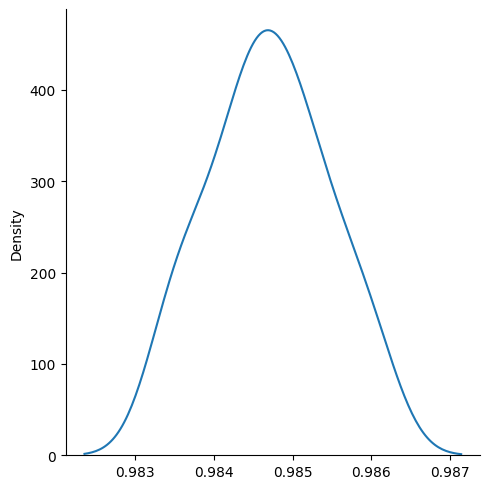

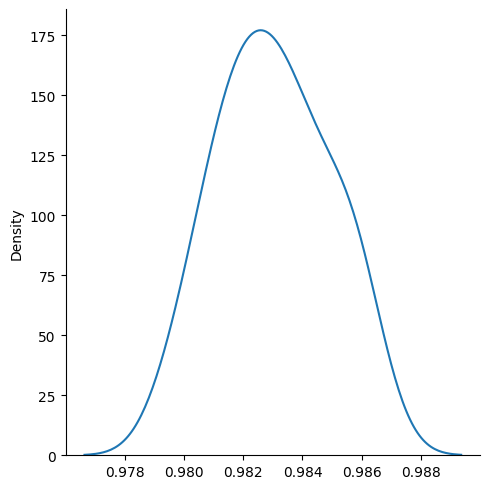

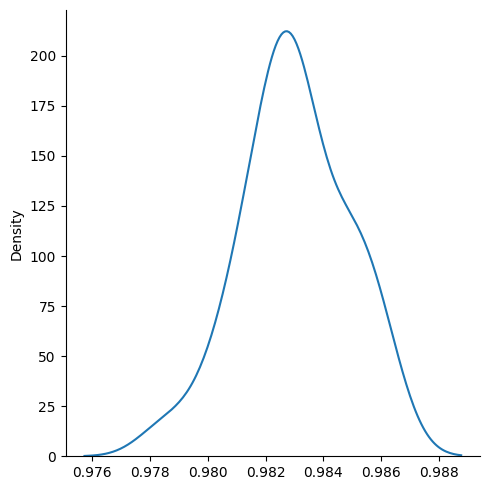

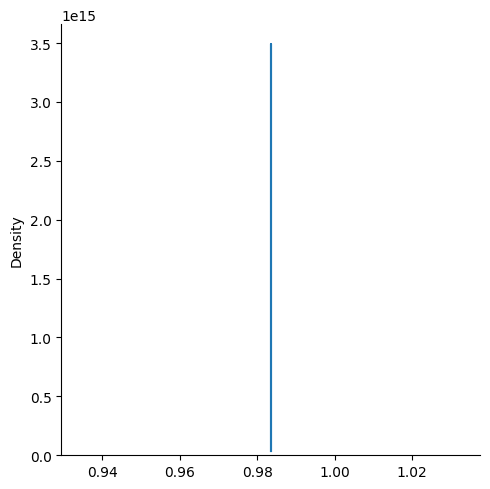

In [25]:
import seaborn as sns

sns.displot(resultados_arvore, kind='kde');
sns.displot(resultados_random_forest, kind='kde');
sns.displot(resultados_knn, kind='kde');
sns.displot(resultados_svm, kind='kde');

## ANOVA e Tukey

In [30]:
from scipy.stats import f_oneway

_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_svm)
print('p =', p)

alpha=0.05
if p <= alpha:
    print('Hipótese Nula Rejeitada. Dados são Diferentes')
else:
    print('Hipótese Alternativa Rejeitada. Resultados são Iguais')

p = 4.848132932476204e-06
Hipótese Nula Rejeitada. Dados são Diferentes


Como são diferentes, usamos Tukey para identificar o melhor.

In [37]:
list_argoritmo = []
for name in ['arvore','random_forest','knn','svm']:
    for i in range(30):
        list_argoritmo.append(name)

In [40]:
resultados_algoritmos = {'accuracy':np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_svm]),
                         'algoritmo':list_argoritmo}
resultados_df = pd.DataFrame(resultados_algoritmos)
display(resultados_df.head(5),resultados_df.tail(5))

,accuracy,algoritmo
0,0.9850,arvore
1,0.9845,arvore
2,0.9850,arvore
3,0.9845,arvore
4,0.9845,arvore


,accuracy,algoritmo
115,0.9835,svm
116,0.9835,svm
117,0.9835,svm
118,0.9835,svm
119,0.9835,svm


In [43]:
from statsmodels.stats.multicomp import MultiComparison

compare_algoritmos = MultiComparison(resultados_df['accuracy'],resultados_df['algoritmo'])
teste_estatistico = compare_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0017    0.0 -0.0026 -0.0008   True
       arvore random_forest  -0.0017    0.0 -0.0026 -0.0008   True
       arvore           svm  -0.0012 0.0047 -0.0021 -0.0003   True
          knn random_forest      0.0 0.9997 -0.0009  0.0009  False
          knn           svm   0.0005 0.4865 -0.0004  0.0014  False
random_forest           svm   0.0005 0.5459 -0.0004  0.0014  False
------------------------------------------------------------------


Arvore           0.984700
Random Forest    0.983033
KNN              0.983000
SVM              0.983500
dtype: float64

Vemos que só temos True para Arvore em Tukey já que ele é estatisticamente superior aos outros (diferentemente dos outros que são estatisticamente equivalentes)


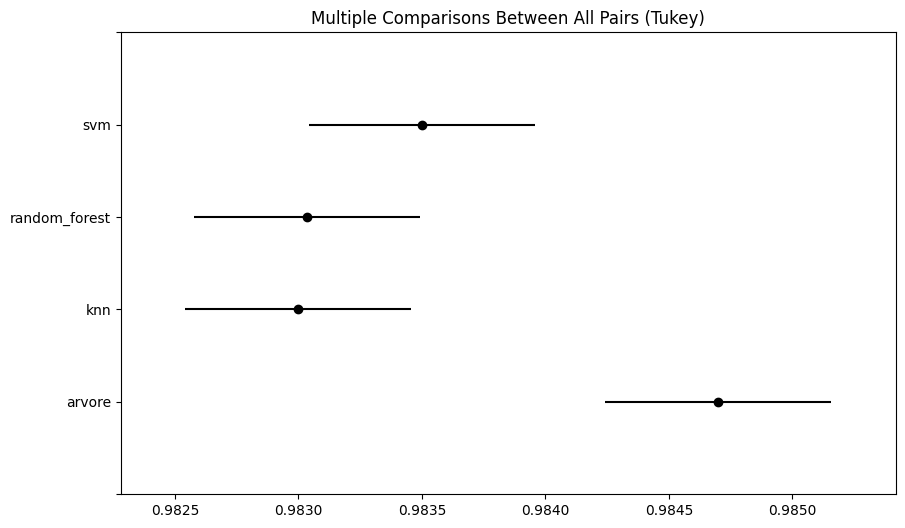

In [46]:
display(results.mean())
print('Vemos que só temos True para Arvore em Tukey já que ele é estatisticamente superior aos outros (diferentemente dos outros que são estatisticamente equivalentes)')
teste_estatistico.plot_simultaneous();

## Salvar um Classificador Já Treinado

In [11]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best');
classificador_arvore.fit(X_credit, y_credit);
with open('classificador_arvore.sav',mode='wb') as f:
    pickle.dump(classificador_arvore, f)

classificador_svm = SVC(C=1.5, kernel='rbf', tol=0.0001, probability=True)
classificador_svm.fit(X_credit, y_credit);
with open('classificador_svm.sav',mode='wb') as f:
    pickle.dump(classificador_svm, f)